# HOMEWORK 8

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import cvxpy as cp
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
import warnings
warnings.simplefilter('ignore')

## 1. Newton's Method

Given our quadratic program $\min\limits_x f(x) = \frac{1}{2}x^TQx + c^Tx$ where $Q = \begin{bmatrix}101 & -99 \\ -99 & 101 \end{bmatrix}$ and $c = \begin{bmatrix}2 & 2\end{bmatrix}^T$.

### (a)

Given our quadratic equation, we know that $\frac{\partial f}{\partial x} = Qx + c$ thus,

$$x^{+} = x - \gamma \frac{\partial f}{\partial x}^T = x - \gamma(Qx + c) $$

We can then perform this operation iteratively to attempt to reach the minimum of our quadratic program. The calculation for the gradient descent with a $\gamma = 0.001$ is captured in the code below in part (b).

### (b)

The graph below does appropraitely towads the minimum that can be visibly seen via the level sets included in the problem statement. It seems that the graph projects first towards a point along the vector $c$ before beginning it's descent towards the minimum point.

I noticed that when attempted to perform this descent with larger step size values I had issues with exponential growth instead of descent.

Optimum x: [[-0.99999999]
 [-0.99999999]]


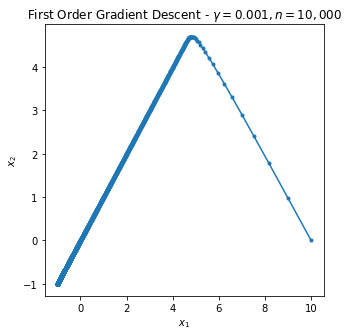

In [4]:
Q = np.matrix([[101, -99], [-99, 101]])
c = np.matrix([2, 2]).T

x_0 = np.matrix([[10], [0]])
gamma = 0.001
n = 10000

x_first = x_0

for i in range(n):
    x_0 = x_0 - gamma * (Q @ x_0 + c)
    x_first = np.append(x_first, x_0, axis=1)

x_first = x_first.T

print('Optimum x:', x_0)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_first[:, 0], x_first[:, 1], marker='.')
ax.set_title('First Order Gradient Descent - $\gamma = 0.001, n=10,000$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.show()

### (c)

Given our quadratic equation, we know that $\frac{\partial f}{\partial x} = Qx + c$ and $\frac{\partial^2 f}{\partial x^2} = Q$ thus,

$$x^{+} = x - \gamma(\frac{\partial^2 f}{\partial x^2})^{-1} \frac{\partial f}{\partial x}^T = x - \gamma Q^{-1}(Qx + c) $$
$$x^{+} = x - \gamma (x + Q^{-1}c)$$

We can then perform this operation iteratively to attempt to reach the minimum of our quadratic program. The calculation for the Newton's method with a $\gamma = 0.1$ is captured in the code below in part (b).

### (d)

Some of the first things to note is that I could reach the minimum with a significantly lower step size $\gamma$ as compared to the first order gradient descent ($0.1$ vs. $0.001$); in addition, I also reached the approximate minimum is a significantly smaller number of steps because I chose a smaller step size ($50$ vs. $1000$).

Optimum x: [[-0.94330847]
 [-0.99484622]]


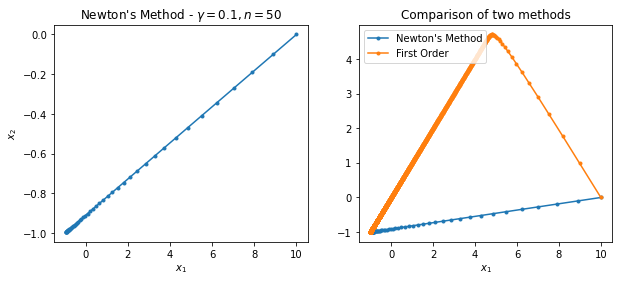

In [5]:
Q = np.matrix([[101, -99], [-99, 101]])
c = np.matrix([2, 2]).T

x_0 = np.matrix([[10], [0]])
gamma = 0.1
n = 50

x_newton = x_0

for i in range(n):
    x_0 = x_0 - gamma * (x_0 + np.linalg.inv(Q) @ c)
    x_newton = np.append(x_newton, x_0, axis=1)

x_newton = x_newton.T

print('Optimum x:', x_0)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(x_newton[:, 0], x_newton[:, 1], marker='.')
ax[0].set_title('Newton\'s Method - $\gamma = 0.1, n=50$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

ax[1].plot(x_newton[:, 0], x_newton[:, 1], marker='.', label='Newton\'s Method')
ax[1].plot(x_first[:, 0], x_first[:, 1], marker='.', label='First Order')
ax[1].set_title('Comparison of two methods')
ax[1].legend(loc='upper left')
ax[1].set_xlabel('$x_1$')
fig.show()

### (e)

Given $\min\limits_x 10x_1^4 + 2x_2^4 + 2x_3^4 + 2x_4^4$ s.t. $Ax=b$ where $A = \begin{bmatrix} 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1\end{bmatrix}$ and $b = \begin{bmatrix} 1 & 1 \end{bmatrix}^T$.

We can perform gradient descent using the Lagrangian of the convex program such that

$$\begin{bmatrix}x^+ \\ v^+ \end{bmatrix} = \begin{bmatrix}x \\ v \end{bmatrix} - \gamma \frac{\partial^2 L}{\partial(x, v)^2} \frac{\partial L}{\partial(x, v)}$$

We know from class lecture notes that
$$\frac{\partial L}{\partial(x, v)} = \begin{bmatrix}\nabla f + A^Tv \\ (Ax-b)^T \end{bmatrix}$$
$$\frac{\partial^2 L}{\partial(x, v)^2} = \begin{bmatrix}Q & A^T \\ A & 0 \end{bmatrix}^{-1}$$

where $Q = \frac{\partial^2 f}{\partial x^2} + \sum v_i \frac{\partial^2 (Ax-b)}{\partial x^2}$. We can see that our secon term for $Q$ will result in zero, thus $Q = \frac{\partial^2 f}{\partial x^2}$.

Thus, 

$$\begin{bmatrix}x^+ \\ v^+ \end{bmatrix} = \begin{bmatrix}x \\ v \end{bmatrix} - \gamma \begin{bmatrix}Q & A^T \\ A & 0 \end{bmatrix}^{-1} \begin{bmatrix}\nabla f + A^Tv \\ (Ax-b)^T \end{bmatrix}$$


In [6]:
A = np.array([[1, 1, 0, 0], [0, 0, 1, 1]])
b = np.array([1, 1]).T

xv_0 = np.array([0, 0, 0, 0, 0, 0]).T # Initialize as R^6 because x is R^4 and v is R^2
gamma = 0.01
n = 100000

for i in range(n):
    Q = np.array([120*xv_0[0]**2, 24*xv_0[1]**2 , 24*xv_0[2]**2, 24*xv_0[3]**2])
    Q = np.diagflat(Q)
    
    del_f = np.array([40*xv_0[0]**3, 8*xv_0[1]**3, 8*xv_0[2]**3, 8*xv_0[3]**3]).T

    tempA = np.vstack((np.hstack((Q, A.T)), np.hstack((A, np.zeros(shape=(2,2))))))
    tempB = np.hstack((del_f + A.T @ xv_0[4:6], (A @ xv_0[0:4] - b).T))
    #print(tempA, tempB)

    xv_0 = xv_0 - gamma * np.linalg.pinv(tempA) @ tempB

print('Optimal x:', xv_0[0:4])
print('Optimal v:', xv_0[4:6])

Optimal x: [0.36900697 0.63099303 0.5        0.5       ]
Optimal v: [-2.00985017 -1.        ]


### (f)

At optimum, our values for $\frac{\partial f}{\partial x}$ and $v^TA$ are nearly equivalent as shown in the code snippet below.

In [7]:
del_f = np.array([40*xv_0[0]**3, 8*xv_0[1]**3, 8*xv_0[2]**3, 8*xv_0[3]**3])

print('df/dx: ', del_f)
print('v.T*A: ', xv_0[4:6].T @ A)

df/dx:  [2.00985017 2.00985017 1.         1.        ]
v.T*A:  [-2.00985017 -2.00985017 -1.         -1.        ]


## 2. Interior Point Method

Given the optimization problem $\min\limits_x f(x) = 10x_1^4 + x_2^4$ s.t. $h(x) \leq 0$ where $h(x) = \begin{bmatrix}(x-1)^TQ_1(x-1)-1 \\ (x-1)^TQ_2(x-1)-1 \end{bmatrix}$, $Q_1 = \begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix}$, and $Q_2 = \begin{bmatrix}3 & -1 \\ -1 & 3 \end{bmatrix}$

### (a)

We can re-write the optimization problem as follows,

$$\min\limits_{x, s_i} tf(x) + \mu \sum [\ln(s_i)] $$
s.t. $h(x) = s_i$ and $\mu > 1$.

### (b)

The lagrangian for this new optimization problem is written as follows,

$$L(x, v) = tf(x) + \mu \sum [\ln(s_i)] + v^T (h(x) - s)$$



### (c)

We can perform Newton's method using the equations as provided in the lecture notes, such that:

$$\begin{bmatrix}x^+ \\ s^+ \\ v^+\end{bmatrix} = \begin{bmatrix}x \\ s \\ v\end{bmatrix} - \gamma \begin{bmatrix}Q & 0 & A^T \\ 0 & \mu s^{-2} & -I \\ A & -I & 0\end{bmatrix}^{-1} \begin{bmatrix}\nabla + A^Tv \\ -\mu s^{-1}1 - v \\ h(x) - s\end{bmatrix}$$

where $A = h'(x)$, $Q = \frac{\partial^2 L}{\partial x^2}$.

The code for performing Newton's method for gradient descent for a given $t$ is captured within the while statement below.

### (d)

The optimal x as found from the code is outputted to console below. It seems that increasing the value of $\mu$ causes the code to require more iterations before converging on a given $\delta$ for each value of $t$.

In [78]:
Q_1 = np.array([[3, 1], [1, 3]])
Q_2 = np.array([[3, -1], [-1, 3]])

xvs_0 = np.array([1., 1., 1., 1., 1., 1.]).T
xvs_0_prev = xvs_0 + 1
gamma = 0.01
mu = 1.1
t = 1
n=100

delta = .01

for i in range(n):
    iteration=0

    while np.any(np.absolute(xvs_0 - xvs_0_prev) >= delta):
        iteration+=1
        Q = t*np.array([120*xvs_0[0]**2, 12*xvs_0[1]**2])
        Q = np.diagflat(Q) + xvs_0[2]*Q_1 + xvs_0[3] * Q_2
        
        A = Q_1 + Q_2

        s = np.array([xvs_0[4], xvs_0[5]])

        del_f = t*np.array([40*xvs_0[0]**3, 4*xvs_0[1]**3]).T

        h = np.array([(xvs_0[0:2] - 1).T @ Q_1 @ (xvs_0[0:2] - 1) - 1, (xvs_0[0:2] - 1).T @ Q_2 @ (xvs_0[0:2] - 1) - 1])

        tempA = np.vstack((np.hstack((Q, np.zeros(shape=(2,2)), A.T)), np.hstack((np.zeros(shape=(2,2)), mu*np.diagflat(np.power(s, -2)), -np.identity(2))), np.hstack((A, -np.identity(2), np.zeros(shape=(2,2))))))

        tempB = np.hstack((del_f + A.T @ xv_0[0:2], -mu*np.diagflat(np.power(s, -1)) @ np.ones(shape=(2)), (h - s).T))

        xvs_0_prev = xvs_0
        xvs_0 = xvs_0 - gamma * np.linalg.pinv(tempA) @ tempB

        # Include a break in case it seems that the code is just spiraling and unable to converge to given delta
        if iteration >= 1000:
            break
    
    #print(iteration)
    t = mu*t
    delta = 0.8*delta

print('Optimal x:', xvs_0[0:4])
print('Optimal v:', xvs_0[4:6])

Optimal x: [-2.09936027e-02 -7.04822813e-02  6.55240811e+03  3.14150027e+03]
Optimal v: [3.88572235 1.69118822]


## 3. Simplex Method - Row Geometry

Given $\max\limits_z c^Tz$ s.t. $Cz \leq d$, $z \geq 0$ where $c^T = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$, $C = \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix}$, and $d = \begin{bmatrix} 2 & 2 & 2 & 3 & 3 & 3 \end{bmatrix}^T$.

### (a)

Using a slack variable $s$, we can rewrite the LP in standard form. First, solve for $A$ we have the single constraint $Cz \leq d$ which can be written using the slack variable as $Cz + s = d$. Writing this in vector form and our new $z$ we find,

$$\begin{bmatrix}C & I\end{bmatrix}\begin{bmatrix}z \\ s \end{bmatrix} = d$$

We also know that for our initial linear program, $c^Tz$, we can re-write this with respect to our new $z$ as

$$c^Tz = \begin{bmatrix}c^T & -0-\end{bmatrix}\begin{bmatrix}z \\ s \end{bmatrix}$$

Setting our $x = \begin{bmatrix}z \\ s \end{bmatrix}$ we can re-write the LP such that

$$\max\limits_x \begin{bmatrix}c^T & -0-\end{bmatrix}x$$
$$\text{s.t.} \; \begin{bmatrix}C & I\end{bmatrix}x = \begin{bmatrix}d \end{bmatrix}, x \geq 0$$

When $x = \begin{bmatrix}0 \\ s\end{bmatrix}$ that corresponds to a $z=0$, which occurs when $C^{-1}d = 0$.

### (b)

Writing the tableau for the linear program,

$$T = \begin{bmatrix}1 & -1 & -1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 2 \\ 0 & 0 & 1 & 0 & 0 & 1 & 0 &0 &0 &0 &2 \\ 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 2 \\ 0 & 1 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 3 \\ 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0  &1 & 0 & 3 \\ 0 & 0 & 1 & 1 & 0 &0 &0 &0 &0 &1 & 3\end{bmatrix}$$

In [135]:
r = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0])
b = np.array([[2, 2, 2, 3, 3, 3]]).T
A = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
             [0, 1, 0, 0, 1, 0, 0, 0, 0],
             [0, 0, 1, 0, 0, 1, 0, 0, 0],
             [1, 1, 0, 0, 0, 0, 1, 0, 0],
             [1, 0, 1, 0, 0, 0, 0, 1, 0],
             [0, 1, 1, 0, 0, 0, 0, 0, 1]])

T = np.block([[1., -r, 0],
              [np.zeros(shape=(6, 1)), A, b]])

print('Starting tableau:')
print(T)

Starting tableau:
[[ 1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  2.]
 [ 0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  3.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  3.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  3.]]


### (c)

Based on the final solution, our optimal $x$ is $x = \begin{bmatrix}2 & 1 & 1 & 1 & 1 & 1\end{bmatrix}^T$. The corresponding optimal $z$ is $z = \begin{bmatrix}2 & 1 & 1\end{bmatrix}^T$ (as $z$ is the first 3 terms/rows of $x$). Based on which slack variables in our resulting $T$ are zero ($s_2$, $s_3$, and $s_6$), we know that the 2nd, 3rd and 6th rows are satisfied with equality.

In [136]:
T[4] = T[4] - T[1]
T[5] = T[5] - T[1]
T[0] = T[0] + T[1]

#T[5] = T[5] - T[3]
#T[6] = T[6] - T[3]
#T[0] = T[0] + T[3]

print(T)
print('Current Reward:', T[0, -1])

[[ 1.  0. -1. -1.  1.  0.  0.  0.  0.  0.  2.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  2.]
 [ 0.  0.  1.  0. -1.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  3.]]
Current Reward: 2.0


In [137]:
T[6] = T[6] - T[4]
T[2] = T[2] - T[4]
T[0] = T[0] + T[4]

print(T)
print('Current Reward:', T[0, -1])

[[ 1.  0.  0. -1.  0.  0.  0.  1.  0.  0.  3.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  1.  1.  0. -1.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  2.]
 [ 0.  0.  1.  0. -1.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  1.  1.  0.  0. -1.  0.  1.  2.]]
Current Reward: 3.0


In [138]:
T[6] = T[6] - T[5]
T[3] = T[3] - T[5]
T[0] = T[0] + T[5]

print(T)
print('Current Reward:', T[0, -1])

[[ 1.  0.  0.  0. -1.  0.  0.  1.  1.  0.  4.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  1.  1.  0. -1.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0. -1.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  2.  0.  0. -1. -1.  1.  1.]]
Current Reward: 4.0


### (d)

For my route, I traveled along the route $0 \rightarrow 1 \rightarrow 4 \rightarrow 10 \rightarrow 13$.

## 4. Simplex Method - Column Geometry

### (a)

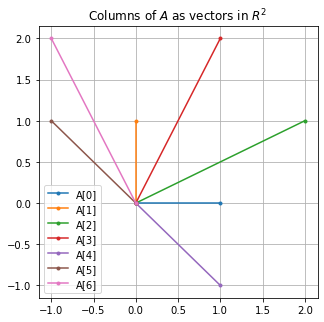

In [154]:
A = np.array([[1, 0, 2, 1, 1, -1, -1], [0, 1, 1, 2, -1, 1, 2]])
n, m = A.shape
origin = np.array([0, 0]).T

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(m):
    vec = A[:, i]
    x = [origin[0], vec[0]]
    y = [origin[1], vec[1]]
    label = f"A[{i}]"
    ax.plot(x, y, marker='.', label=label)

ax.set_title('Columns of $A$ as vectors in $R^2$')
ax.legend()
ax.grid()
fig.show()

### (b)

The pairs of basis vectors ($A_i$ and $A_{i'}$) that meet the condition of $\begin{bmatrix}A_i & A_{i'}\end{bmatrix}\begin{bmatrix}x_i \\ x_{i'}\end{bmatrix} = b$ where $b =\begin{bmatrix}-1 \\ 2\end{bmatrix} $ are calculated and outputted in the code below.

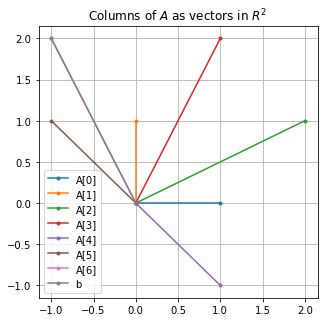

In [155]:
A = np.array([[1, 0, 2, 1, 1, -1, -1], [0, 1, 1, 2, -1, 1, 2]])
n, m = A.shape
origin = np.array([0, 0]).T

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(m):
    vec = A[:, i]
    x = [origin[0], vec[0]]
    y = [origin[1], vec[1]]
    label = f"A[{i}]"
    ax.plot(x, y, marker='.', label=label)

ax.plot([0, -1], [0, 2], marker='.', label='b')
ax.set_title('Columns of $A$ as vectors in $R^2$')
ax.legend()
ax.grid()
fig.show()

In [183]:
for i in range(m):
    for j in range(i+1, m):
        a = np.array([[A[0, i], A[0, j]], [A[1, i], A[1, j]]])
        b = np.array([[-1], [2]])
        try:
            x = np.linalg.solve(a, b).T
            if np.all(x >= 0):
                print('Pairs of A:', i, j)
                #print(a, '\n', np.linalg.solve(a, b).T, '\n')
        except:
            continue

Pairs of A: 0 5
Pairs of A: 0 6
Pairs of A: 1 5
Pairs of A: 1 6
Pairs of A: 2 5
Pairs of A: 2 6
Pairs of A: 3 5
Pairs of A: 3 6
Pairs of A: 4 6
Pairs of A: 5 6


### (c)

The pairs of basis vectors ($A_i$ and $A_{i'}$) that meet the condition of $\begin{bmatrix}A_i & A_{i'}\end{bmatrix}\begin{bmatrix}x_i \\ x_{i'}\end{bmatrix} = b$ where $b = \begin{bmatrix}3 \\ 1\end{bmatrix} $ are calculated and outputted in the code below.

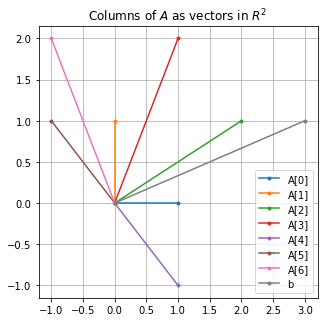

In [156]:
A = np.array([[1, 0, 2, 1, 1, -1, -1], [0, 1, 1, 2, -1, 1, 2]])
n, m = A.shape
origin = np.array([0, 0]).T

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(m):
    vec = A[:, i]
    x = [origin[0], vec[0]]
    y = [origin[1], vec[1]]
    label = f"A[{i}]"
    ax.plot(x, y, marker='.', label=label)

ax.plot([0, 3], [0, 1], marker='.', label='b')
ax.set_title('Columns of $A$ as vectors in $R^2$')
ax.legend()
ax.grid()
fig.show()

In [184]:
for i in range(m):
    for j in range(i+1, m):
        a = np.array([[A[0, i], A[0, j]], [A[1, i], A[1, j]]])
        b = np.array([[3], [1]])
        try:
            x = np.linalg.solve(a, b).T
            if np.all(x >= 0):
                print('Pairs of A:', i, j)
                #print(a, '\n', np.linalg.solve(a, b).T, '\n')
        except:
            continue

Pairs of A: 0 1
Pairs of A: 0 2
Pairs of A: 0 3
Pairs of A: 0 5
Pairs of A: 0 6
Pairs of A: 1 4
Pairs of A: 2 4
Pairs of A: 3 4
Pairs of A: 4 6


### (c)

In [9]:
r = np.array([-3, -1, -1, 1, -3, 3, 3])
b = np.array([[2, 2]]).T
A = np.array([[1, 0, 2, 1, 1, -1, -1],
             [0, 1, 1, 2, -1, 1, 2]])

T = np.block([[1., -r, 0],
              [np.zeros(shape=(2, 1)), A, b]])

print('Starting tableau:')
print(T)

Starting tableau:
[[ 1.  3.  1.  1. -1.  3. -3. -3.  0.]
 [ 0.  1.  0.  2.  1.  1. -1. -1.  2.]
 [ 0.  0.  1.  1.  2. -1.  1.  2.  2.]]


In [10]:
T[2] = .5*T[2]
T[1] = T[1] - T[2]
T[0] = T[0] + T[2]

print(T)
print('Current Reward:', T[0, -1])

[[ 1.   3.   1.5  1.5  0.   2.5 -2.5 -2.   1. ]
 [ 0.   1.  -0.5  1.5  0.   1.5 -1.5 -2.   1. ]
 [ 0.   0.   0.5  0.5  1.  -0.5  0.5  1.   1. ]]
Current Reward: 1.0


In [11]:
T[1] = T[1] / 1.5
T[2] = T[2] - 0.5*T[1]
T[0] = T[0] + T[1]

print(np.round_(T, decimals=2))
print('Current Reward:', T[0, -1])

[[ 1.    3.67  1.17  2.5   0.    3.5  -3.5  -3.33  1.67]
 [ 0.    0.67 -0.33  1.    0.    1.   -1.   -1.33  0.67]
 [ 0.   -0.33  0.67  0.    1.   -1.    1.    1.67  0.67]]
Current Reward: 1.6666666666666665


In [12]:
T[1] = T[1] + T[2]
T[0] = T[0] + 3.5*T[2]

print(np.round_(T, decimals=2))
print('Current Reward:', T[0, -1])

[[ 1.    2.5   3.5   2.5   3.5   0.    0.    2.5   4.  ]
 [ 0.    0.33  0.33  1.    1.    0.    0.    0.33  1.33]
 [ 0.   -0.33  0.67  0.    1.   -1.    1.    1.67  0.67]]
Current Reward: 4.0


### (d)



In [5]:
r = np.array([-3, 0, 1, 2, 1, -1, 2])
b = np.array([[2, 0]]).T
A = np.array([[1, 0, 2, 1, 1, -1, -1],
             [0, 1, 1, 2, -1, 1, 2]])

T = np.block([[1., -r, 0],
              [np.zeros(shape=(2, 1)), A, b]])

print('Starting tableau:')
print(T)

Starting tableau:
[[ 1.  3.  0. -1. -2. -1.  1. -2.  0.]
 [ 0.  1.  0.  2.  1.  1. -1. -1.  2.]
 [ 0.  0.  1.  1.  2. -1.  1.  2.  0.]]


In [6]:
T[1] = T[1] - 2*T[2]
T[0] = T[0] + T[2]

print(np.round_(T, decimals=2))
print('Current Reward:', T[0, -1])

[[ 1.  3.  1.  0.  0. -2.  2.  0.  0.]
 [ 0.  1. -2.  0. -3.  3. -3. -5.  2.]
 [ 0.  0.  1.  1.  2. -1.  1.  2.  0.]]
Current Reward: 0.0


In [7]:
T[2] = T[2] + 1/3*T[1]
T[0] = T[0] + 2/3*T[1]

print(np.round_(T, decimals=2))
print('Current Reward:', T[0, -1])

[[ 1.    3.67 -0.33  0.   -2.    0.    0.   -3.33  1.33]
 [ 0.    1.   -2.    0.   -3.    3.   -3.   -5.    2.  ]
 [ 0.    0.33  0.33  1.    1.    0.    0.    0.33  0.67]]
Current Reward: 1.3333333333333333


In [8]:
T[1] = T[1] + 5*3*T[2]
T[0] = T[0] + (3+1/3)*3*T[2]

print(np.round_(T, decimals=2))
print('Current Reward:', T[0, -1])

[[ 1.    7.    3.   10.    8.    0.    0.    0.    8.  ]
 [ 0.    6.    3.   15.   12.    3.   -3.    0.   12.  ]
 [ 0.    0.33  0.33  1.    1.    0.    0.    0.33  0.67]]
Current Reward: 7.999999999999999


### (d)

Based on the results from part (b) and (c), it seems that $\{x_1, x_4, x_3\}$ corresponds to negative and $\{x_2, x_5, x_6, x_7\}$ corresponds to positive values.